# Exploratory Data Analysis

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_list = pd.read_csv("data/listings.csv")
df_rv1 = pd.read_csv("data/reviews1.csv")
df_rv2 = pd.read_csv("data/reviews2.csv")
df_rv3 = pd.read_csv("data/reviews3.csv")
df_rv4 = pd.read_csv("data/reviews4.csv")

In [14]:
# Display Keys

#df_list.keys()

## Initial EDA Q1 - Q3 (Missingness and shapes)

In [15]:
# barplot function

def create_barplot(df,column, title, xlabel, ylabel, FIGSIZE): 
    """
    df (dataframe): dataframe to extract the barplot from
    column, title, xlabel, ylabel (str) : strings that indicate the column to be plotted and axes labels
    FIGSIZE (tuple) : sets figure size
    """
    ax = df[column].value_counts().plot(kind = "bar",
                                             figsize = FIGSIZE,
                                             title = title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

### Question 1 - Shapes of Dataframes

In [16]:
def print_shapes():
    
    print("Printing Shapes")
    print("Listings: ", df_list.shape)
    print("Reviews 1: ", df_rv1.shape)
    print("Reviews 2: ", df_rv2.shape)
    print("Reviews 3:", df_rv3.shape)
    print("Reviews 4:", df_rv4.shape)
    
print_shapes()    

Printing Shapes
Listings:  (9582, 67)
Reviews 1:  (100000, 6)
Reviews 2:  (100000, 6)
Reviews 3: (100000, 6)
Reviews 4: (106607, 6)


### Question 2 - Missingness in Columns

<AxesSubplot:title={'center':'Missing Values in Columns'}, xlabel='Variable Name', ylabel='Count'>

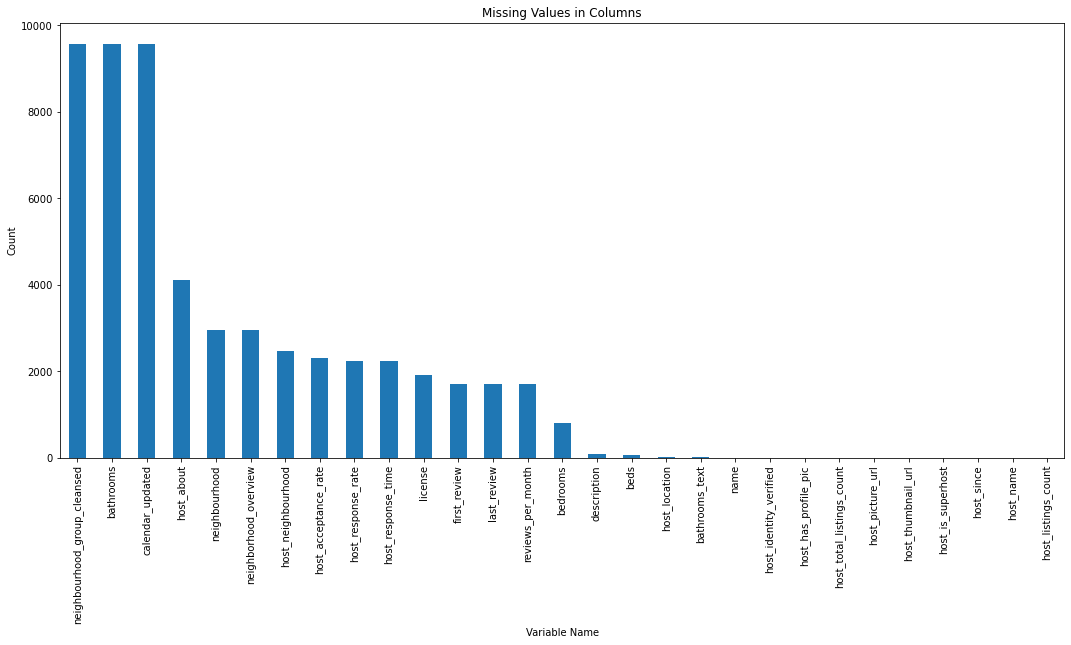

In [17]:
df_list.isnull().sum()[df_list.isnull().sum() != 0].sort_values(ascending = False).plot(kind = "bar", 
                                                                                        title = "Missing Values in Columns",
                                                                                        xlabel = "Variable Name",
                                                                                        ylabel = "Count",
                                                                                        figsize = (18,8))

### Info about columns

In [18]:
df_list["calculated_host_listings_count_private_rooms"].value_counts()  # number of private rooms ranging from 0 to 43
df_list["host_has_profile_pic"].value_counts()  # almost all of them are true (30 false) - possibly not informative enough
df_list["neighbourhood"].value_counts()  # sparse 6k in athens with no neighbourhood
df_list["host_neighbourhood"].value_counts()  # indicates neighboorhood of host?
df_list["neighbourhood_cleansed"].value_counts()  # cleaned version for neighbourhood
df_list["id"].value_counts()   # id is unique for each listing, as is index
f=df_list["has_availability"].value_counts()  # only 200 false out of 9.5k


## Additional Visualisation Q4-Q14 (As Suggested by PDF File)

### Question 4 - Value counts of Neighbourhoods

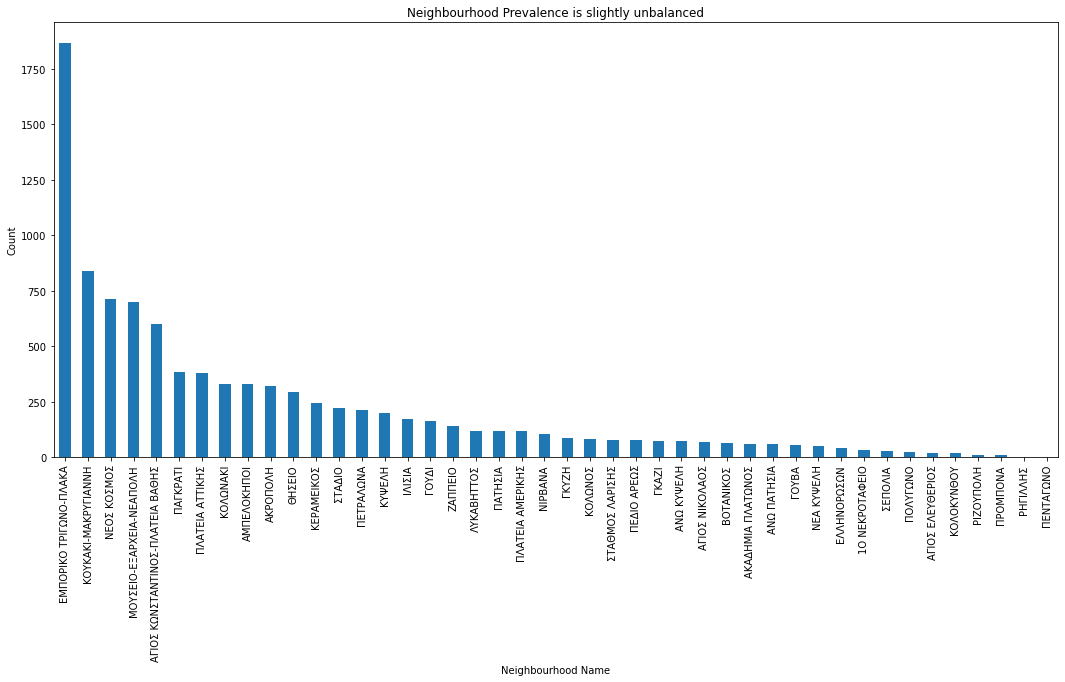

In [19]:
create_barplot(df_list,"neighbourhood_cleansed", "Neighbourhood Prevalence is slightly unbalanced", 
                "Neighbourhood Name", "Count", (18,8))

### Question 5 - Value Counts of Room Type

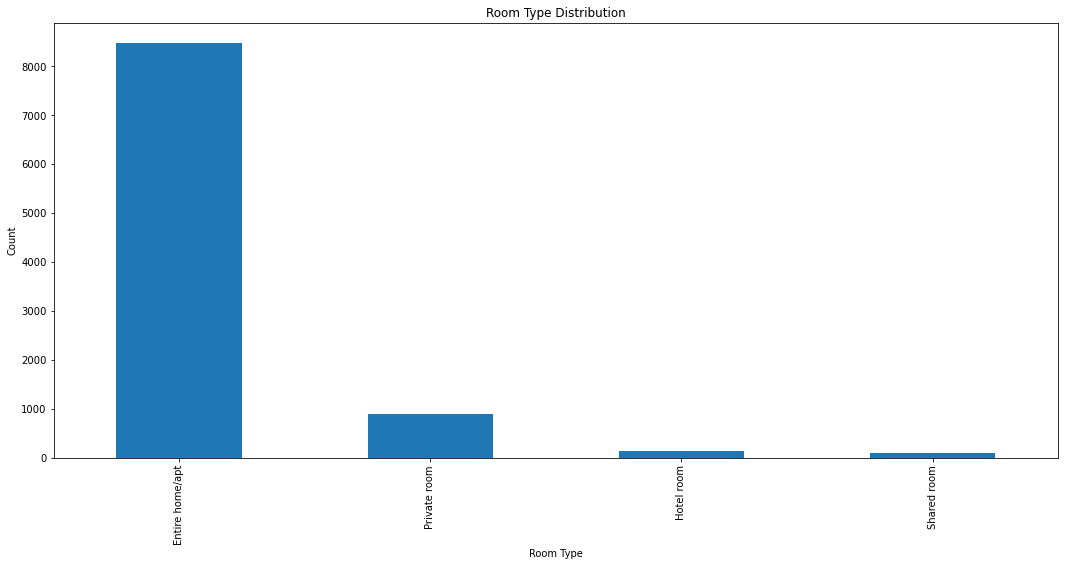

In [20]:
create_barplot(df_list,"room_type", "Room Type Distribution", 
                "Room Type", "Count", (18,8))

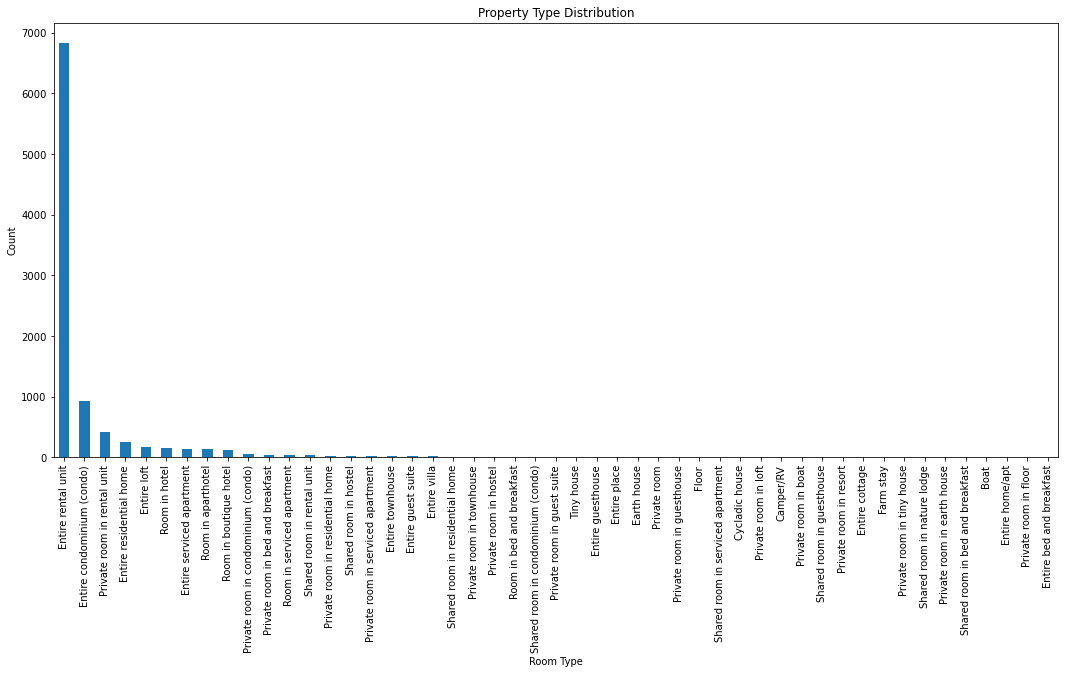

In [21]:
create_barplot(df_list,"property_type", "Property Type Distribution", 
                "Room Type", "Count", (18,8))

### Question 6 - Bedrooms Value Counts

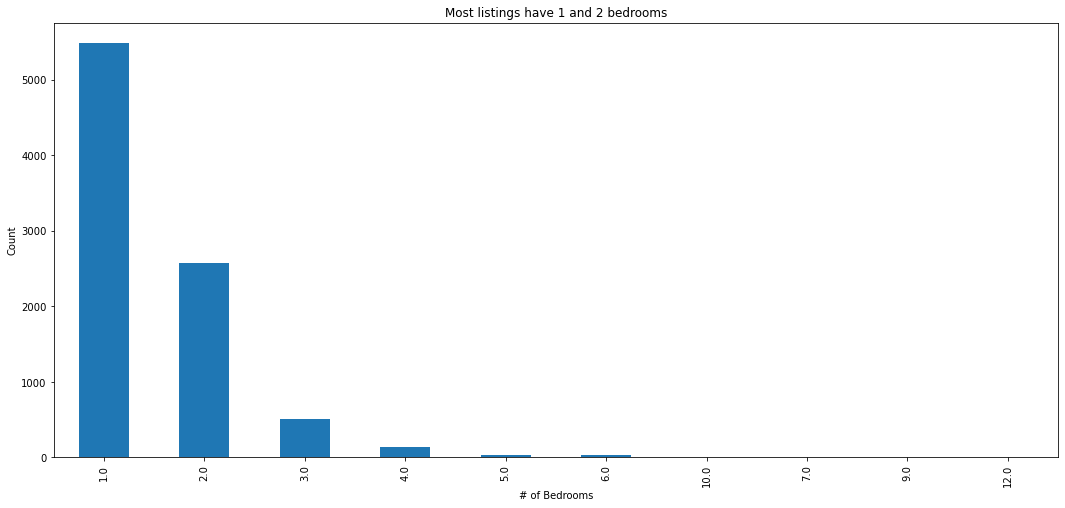

In [22]:
create_barplot(df_list,"bedrooms", "Most listings have 1 and 2 bedrooms", 
                "# of Bedrooms", "Count", (18,8))

### Question 7 - Distribution of Host listings

<AxesSubplot:title={'center':'Hosts with >20 listings'}, xlabel='Host ID'>

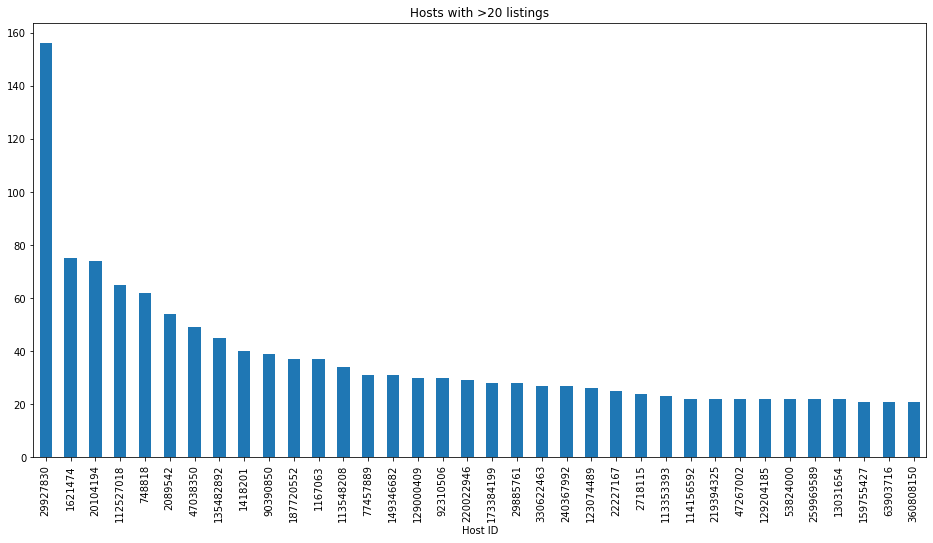

In [23]:
fig = plt.figure(figsize =(16, 8))
df_list["host_id"].value_counts()[df_list["host_id"].value_counts() > 20].plot(kind = "bar",
                                                                              title = "Hosts with >20 listings",
                                                                               xlabel = "Host ID") 
# maximum listings a single host has is 156

### Question 8 - Year of first registered host

In [24]:
print("First registered Host: ", pd.to_datetime(df_list['host_since']).min())

First registered Host:  2009-09-08 00:00:00


### Question 9 - Year with most hosts

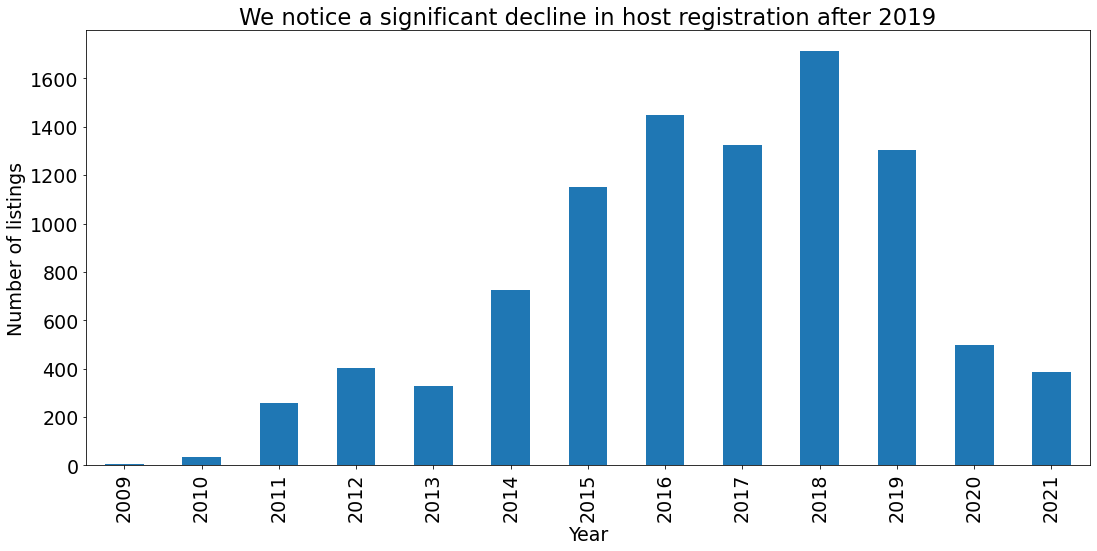

In [25]:
plt.figure()
plt.rcParams.update({'font.size': 19})

ax = pd.to_datetime(df_list['host_since']).dt.strftime("%Y").value_counts().sort_index().plot(kind = "bar",
                                                                                        title = "We notice a significant decline in host registration after 2019",
                                                                                        xlabel = "Year",
                                                                                        ylabel = "Number of listings",
                                                                                        figsize = (18,8))

### Question 10 - How many Identified Hosts?

In [26]:
# Takes verified host lines, filters by unique ID (repeated host as one entry) and prints length

print("Number of verified hosts: ", len(pd.unique(df_list["host_id"][df_list["host_identity_verified"] == "t"]))) 

Number of verified hosts:  2830


In [27]:
print("Percentage of verified hosts: ", 100*2830/len(pd.unique(df_list["host_id"]))) # about 59%

Percentage of verified hosts:  58.958333333333336


### Question 11 - Amentities

In [28]:
# Create list with all nested amentities in it

flat = [item for sublist in df_list["amenities"] for item in sublist.split(",")]

In [29]:
# We will try to group them by amentity

def count_list(list):
    freq = {}

    for item in list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1

    return freq

# Demonstrate how it works
#count_list(flat)

In [30]:
# Turn previous list to dataframe

amentities = pd.DataFrame(list(count_list(flat).items())).rename(columns = {0: "Amentity", 1: "Count"})
#amentities

<AxesSubplot:title={'center':'Amentity distribution'}, xlabel='Amentity'>

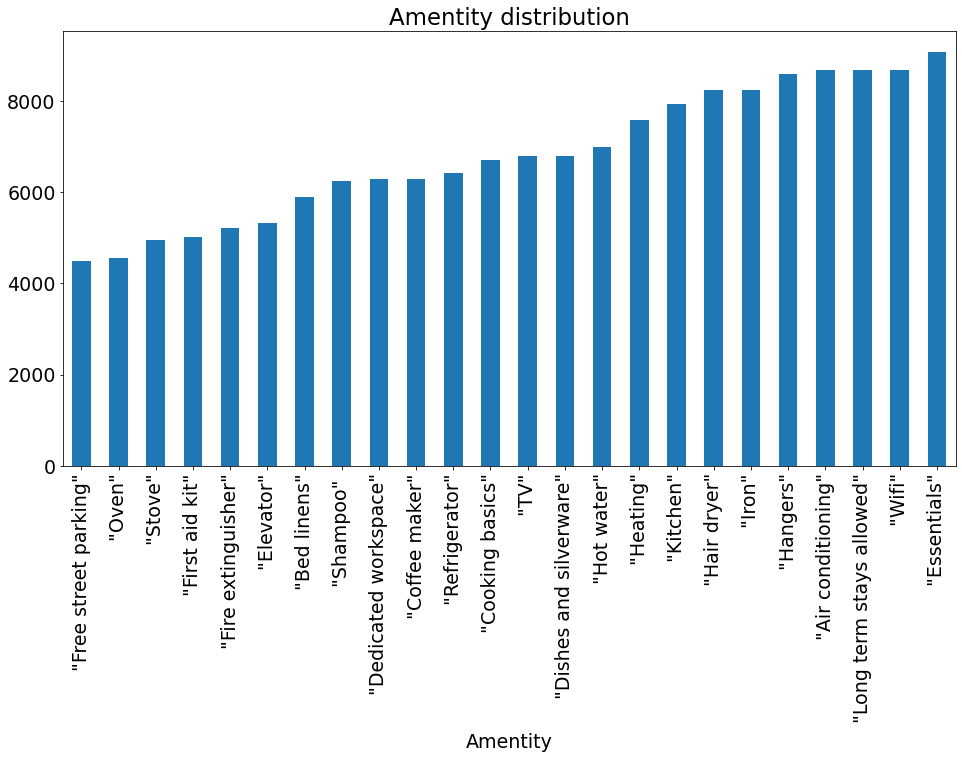

In [31]:
condition = 4000 # value above which amentities will be plotted

amen_modified = amentities[amentities["Count"] > condition].sort_values(by = "Count", ascending = False).pivot_table(values= "Count", columns = "Amentity")

# Rename keys by creating a new list of keys
new_keys = []
for i in amen_modified.keys():
    if ("]" in i):
        new_keys.append(i.replace("]", " "))
    elif ("[" in i):
        new_keys.append(i.replace("[", " "))
    else:
        new_keys.append(i) 

# Keep Old Keys
old_keys = amen_modified.keys()

# Create Dictionary to be inserted into rename() function
dict_rename = {}
j = 0

for i in old_keys:
    dict_rename[i] = new_keys[j]
    j += 1

# Rename Columns
amen_modified = amen_modified.rename(columns = dict_rename)

# Remove first column and plot bar
amen_modified.iloc[0,0:].sort_values().plot(kind = "bar",
                                            title = "Amentity distribution",
                                            figsize = (16,8))

### Question 12 - Distribution of price for each Room Type

In [32]:
# Turn price into float with no $ , characters

df_list["price"] = df_list["price"].str.replace('$', '', regex=True).replace(",","", regex= True).astype("float")

In [33]:
df_list.groupby('room_type')['price'].agg(['mean', 'median'])

,mean,median
room_type,,
Entire home/apt,79.827248,50.0
Hotel room,186.536232,105.0
Private room,102.434343,35.0
Shared room,76.833333,13.0


### Question 13 - How many ratings?

In [34]:
print("# of reviews in total", df_list["number_of_reviews"].sum())

# of reviews in total 406607


### Question 14 - Do all listings have ratings?

In [35]:
(df_list["number_of_reviews"] == 0).sum()

1708

## More Questions

### 1) Price Distribution - We notice uneven distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

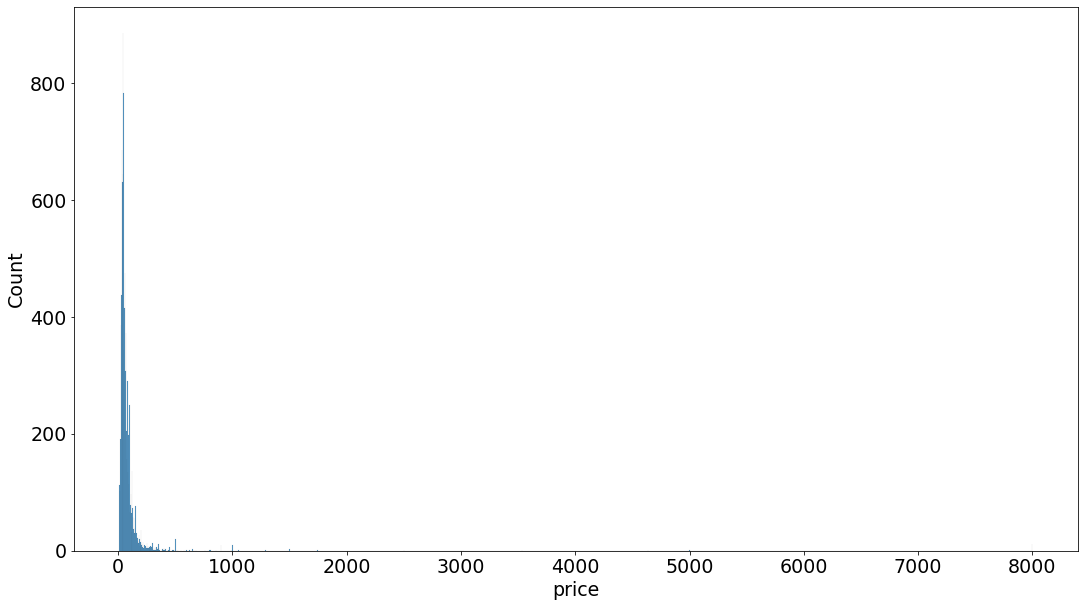

In [36]:
fig = plt.figure(figsize =(18, 10))
sns.histplot(df_list['price'])

### Removing outliers will smoothen the price distribution

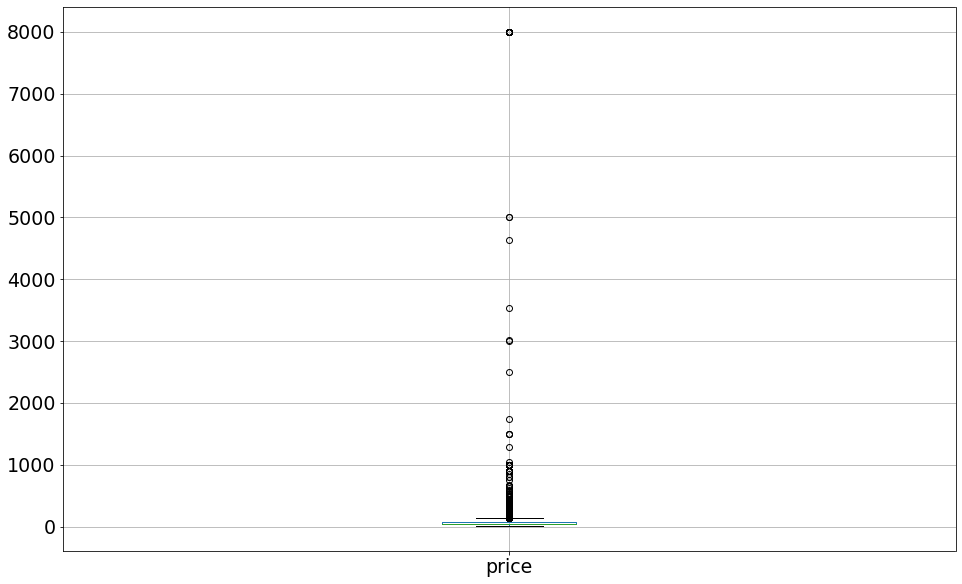

In [37]:
fig = plt.figure(figsize =(16, 10))
boxplot = df_list.boxplot(column=['price'])

### In a similar way, we notice outliers in the rest of the features

### 2) Map distribution of room_types

Text(0.5, 1.0, 'Lattitude to Longitude for Type of room')

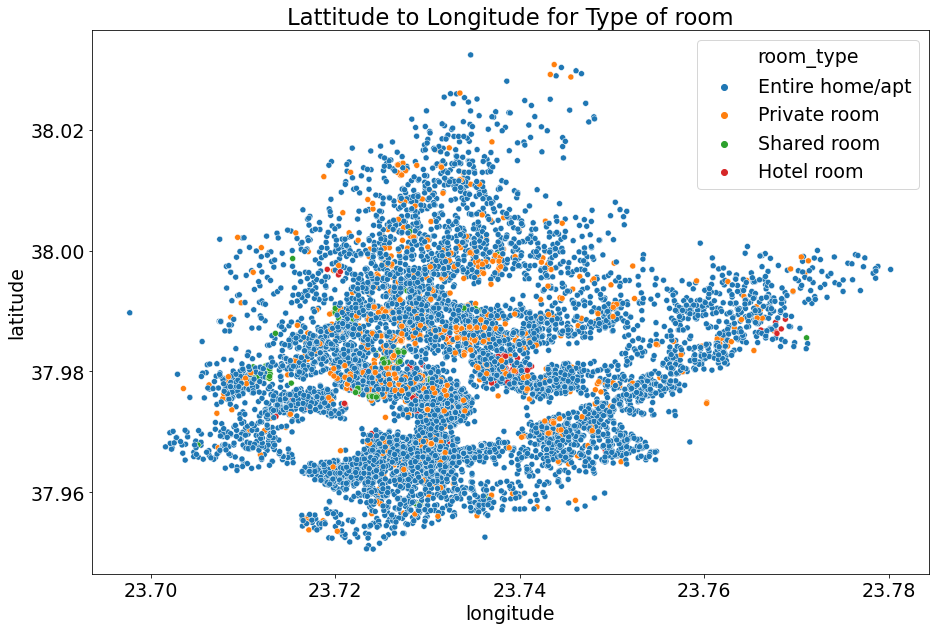

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_list["longitude"], y=df_list["latitude"], hue=df_list["room_type"])
plt.title("Lattitude to Longitude for Type of room")

### 3) Neighbourhood map distribution

Text(0.5, 1.0, 'Lattitude to Longitude for Neighbourhood')

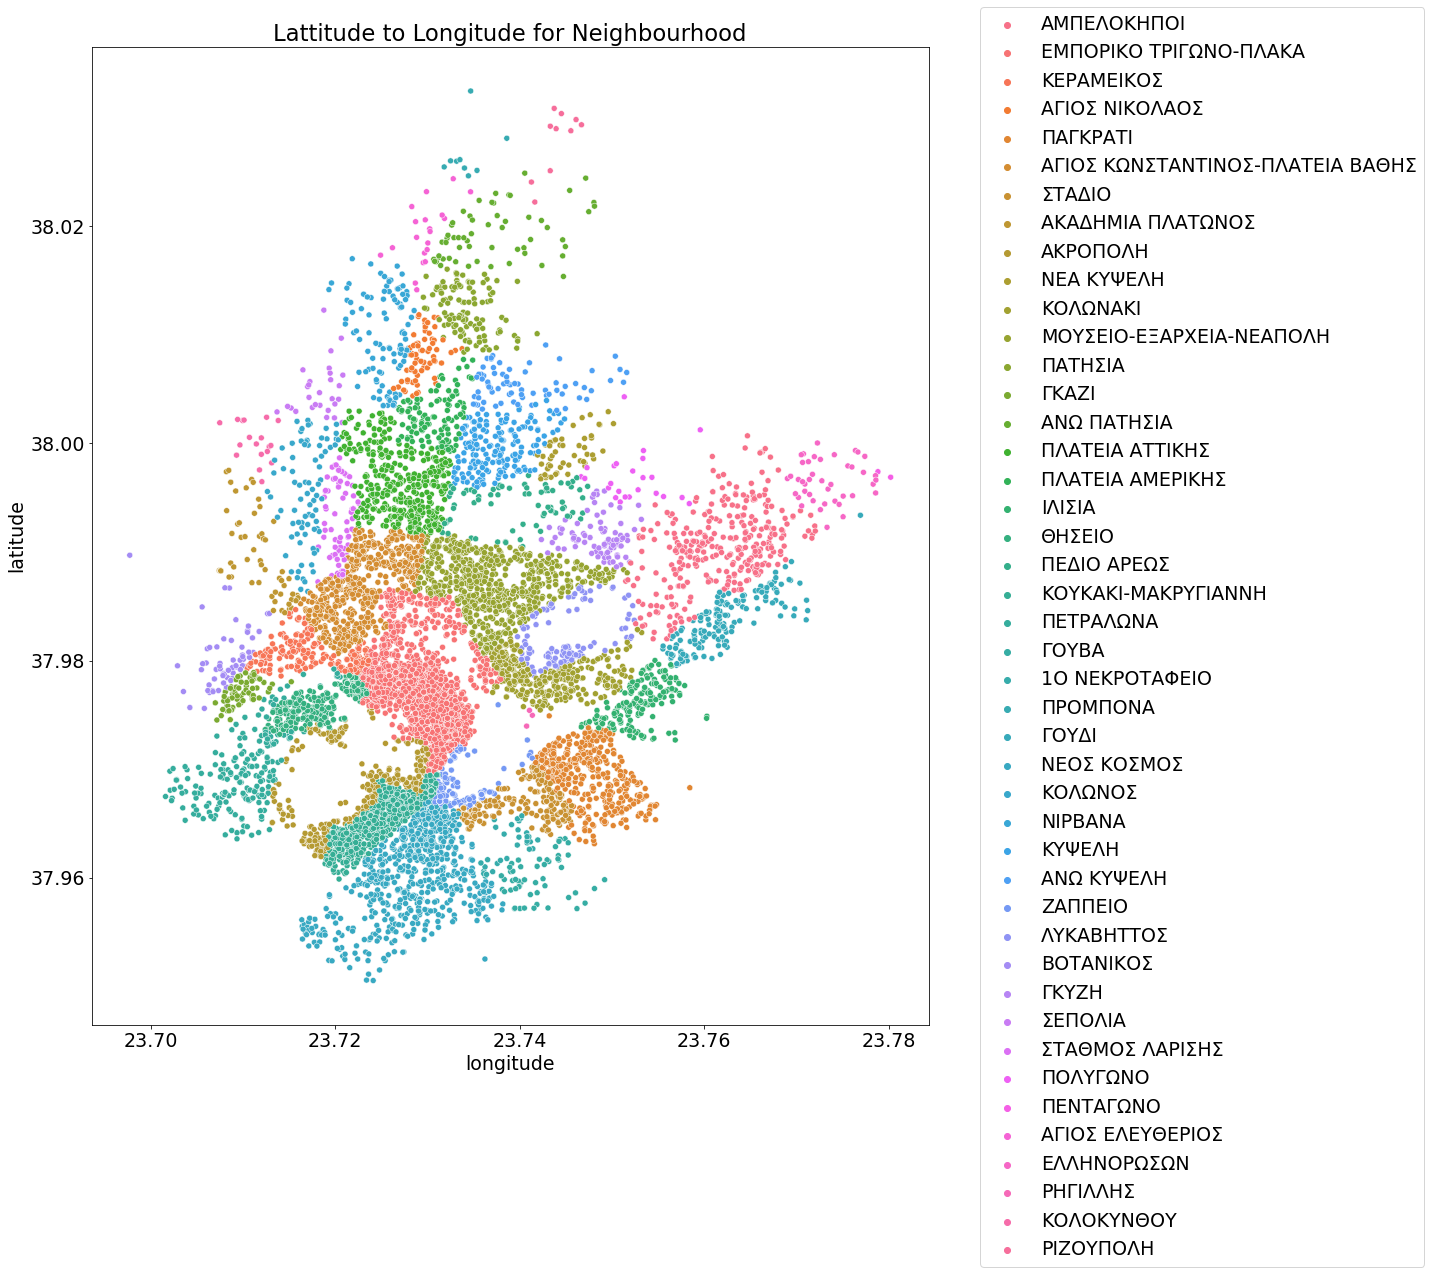

In [39]:
plt.figure(figsize=(15,18))
sns.scatterplot(x=df_list["longitude"], y=df_list["latitude"], hue=df_list['neighbourhood_cleansed'])
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title("Lattitude to Longitude for Neighbourhood")

### 4) Figure Correlation plot

<AxesSubplot:>

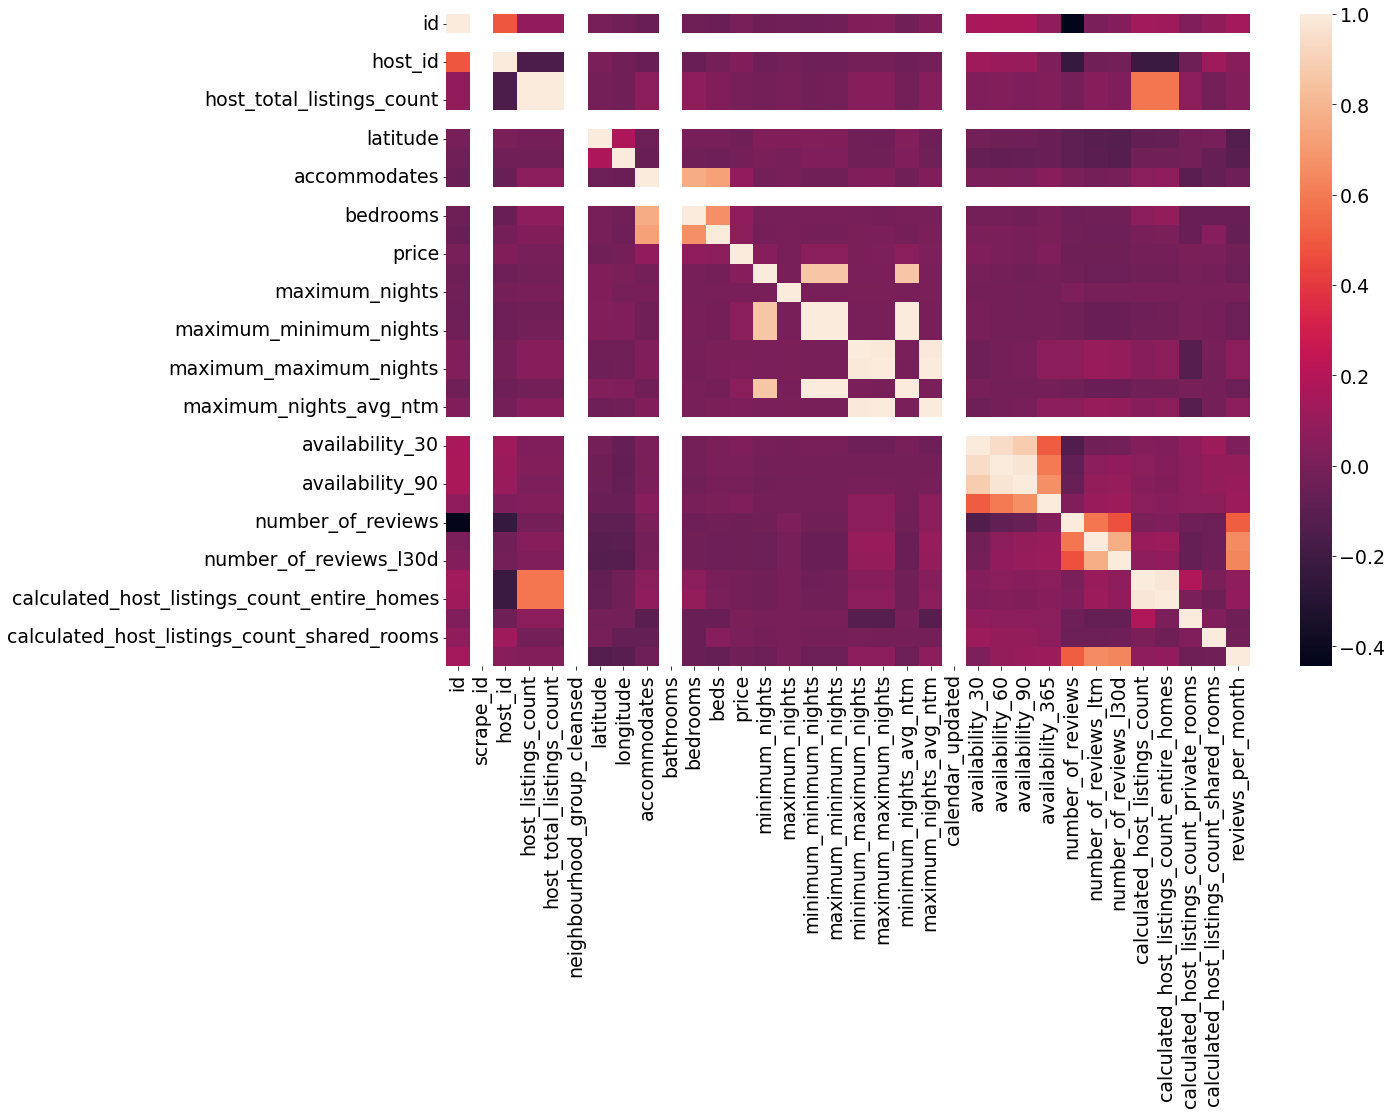

In [40]:
fig = plt.figure(figsize =(18, 12))
sns.heatmap(df_list.corr())

# Final feature selection

### Based on the analysis above and other small observations we got a better idea on which features we will retain to work with and which features might need cleaning/scaling

In [43]:
df_listings_clean = df_list[[
                            ### INFO ABOUT LOCATION & HOST
                            "neighbourhood_cleansed", # names of neighbourhoods
                            "host_since", # older hosts = more credibility? (will not work on new host)
                            "host_response_rate", # linked to credibility - problematic for new entries
                            "host_acceptance_rate", # same
                            "host_is_superhost", # same (new host always false - how is superhost defined?)
                            "host_listings_count", # more listings = more experience = higher ratings?
                            "host_identity_verified", # identity verified/not higher ratings (is likely string)
                            "latitude", # LAT - LONG need preprocessing 
                            "longitude", 

                            ### INFO ABOUT ROOM 
                            "room_type", # more meaningful & diverse than property type (check visualisation)
                            "bathrooms_text", # needs preprocessing -> int
                            "bedrooms", # !!!! Bedrooms and beds might contain the same amount of info 
                            "beds", # run a correlation with bedrooms
                            "amenities", # extract features and preprocess with T/F & 1-hot-encoding

                            ### INFO ABOUT PRICE-RATINGS
                            "number_of_reviews", # more reviews -> more likely to get booked -> more high reviews (does not apply to new clients)
                            "reviews_per_month", # Same
                            "license", # possibly turn it into a T-F variable (has lisence or not)

                            ### RESPONSE
                            "price", # turn to int ? check missingness!!

                            ]]
#df_listings_clean.head()

<AxesSubplot:>

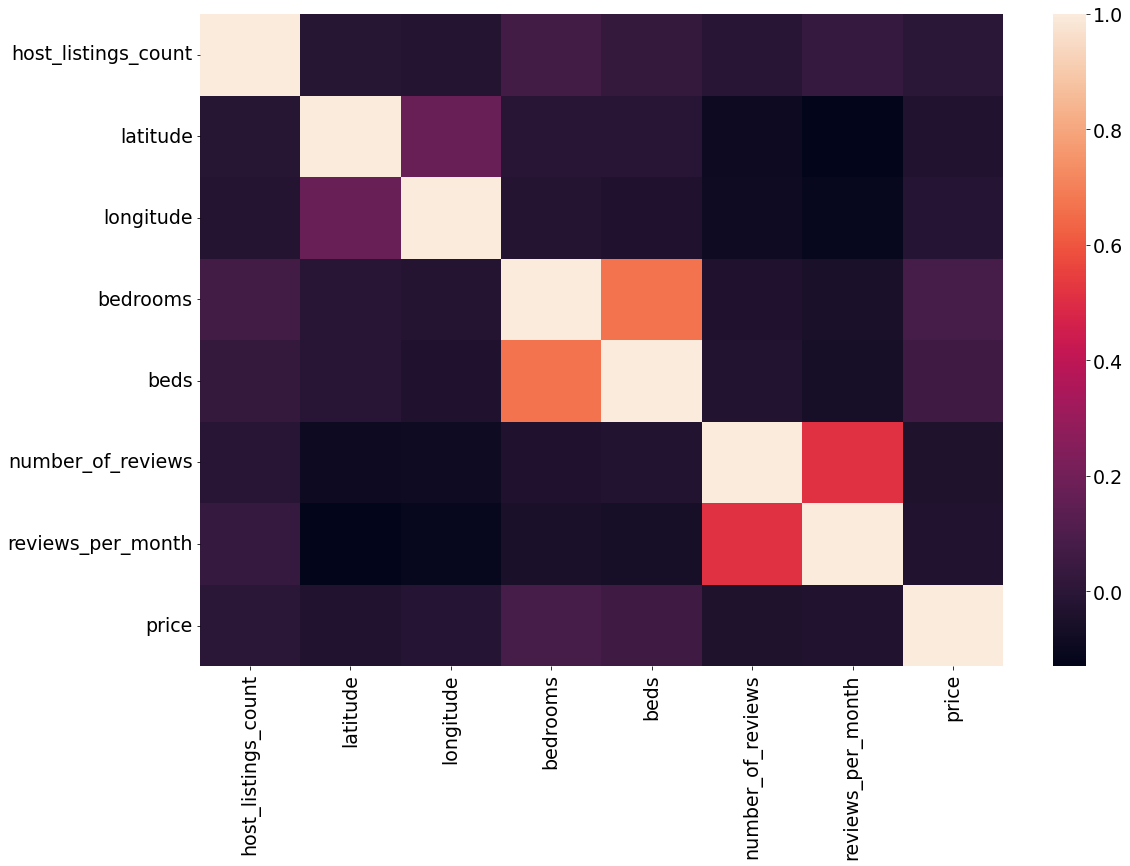

In [46]:
fig = plt.figure(figsize =(18, 12))
sns.heatmap(df_listings_clean.corr())